In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
sns.set(style="whitegrid")

In [41]:
df = pd.read_csv('F:/MyProjects/PraxisProjects/hospital-readmission-risk-prediction/notebooks/dataset/diabetic_data.csv', na_values=['?', '[]'], low_memory=False)
display(df.shape)
display(df.columns)
df.head()

(101766, 50)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [42]:
cols_to_drop= [
    "encounter_id",
    "patient_nbr",
    "payer_code",
    "medical_specialty",
    "examide",
    "citoglipton"
]


In [43]:
df = df.drop(columns=cols_to_drop)
display(df.shape)
display(df.columns)
df.head()

(101766, 44)

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [44]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [45]:
df['readmitted'].value_counts(normalize=True)

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

In [46]:
df["readmitted_binary"] = df["readmitted"].map({
    "<30": 1,
    ">30": 0,
    "NO": 0
})

In [47]:
df.drop(columns=["readmitted"], inplace=True)
df["readmitted_binary"].value_counts(normalize=True)

readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [48]:
df.isnull().sum().sum()

np.int64(283812)

<Axes: >

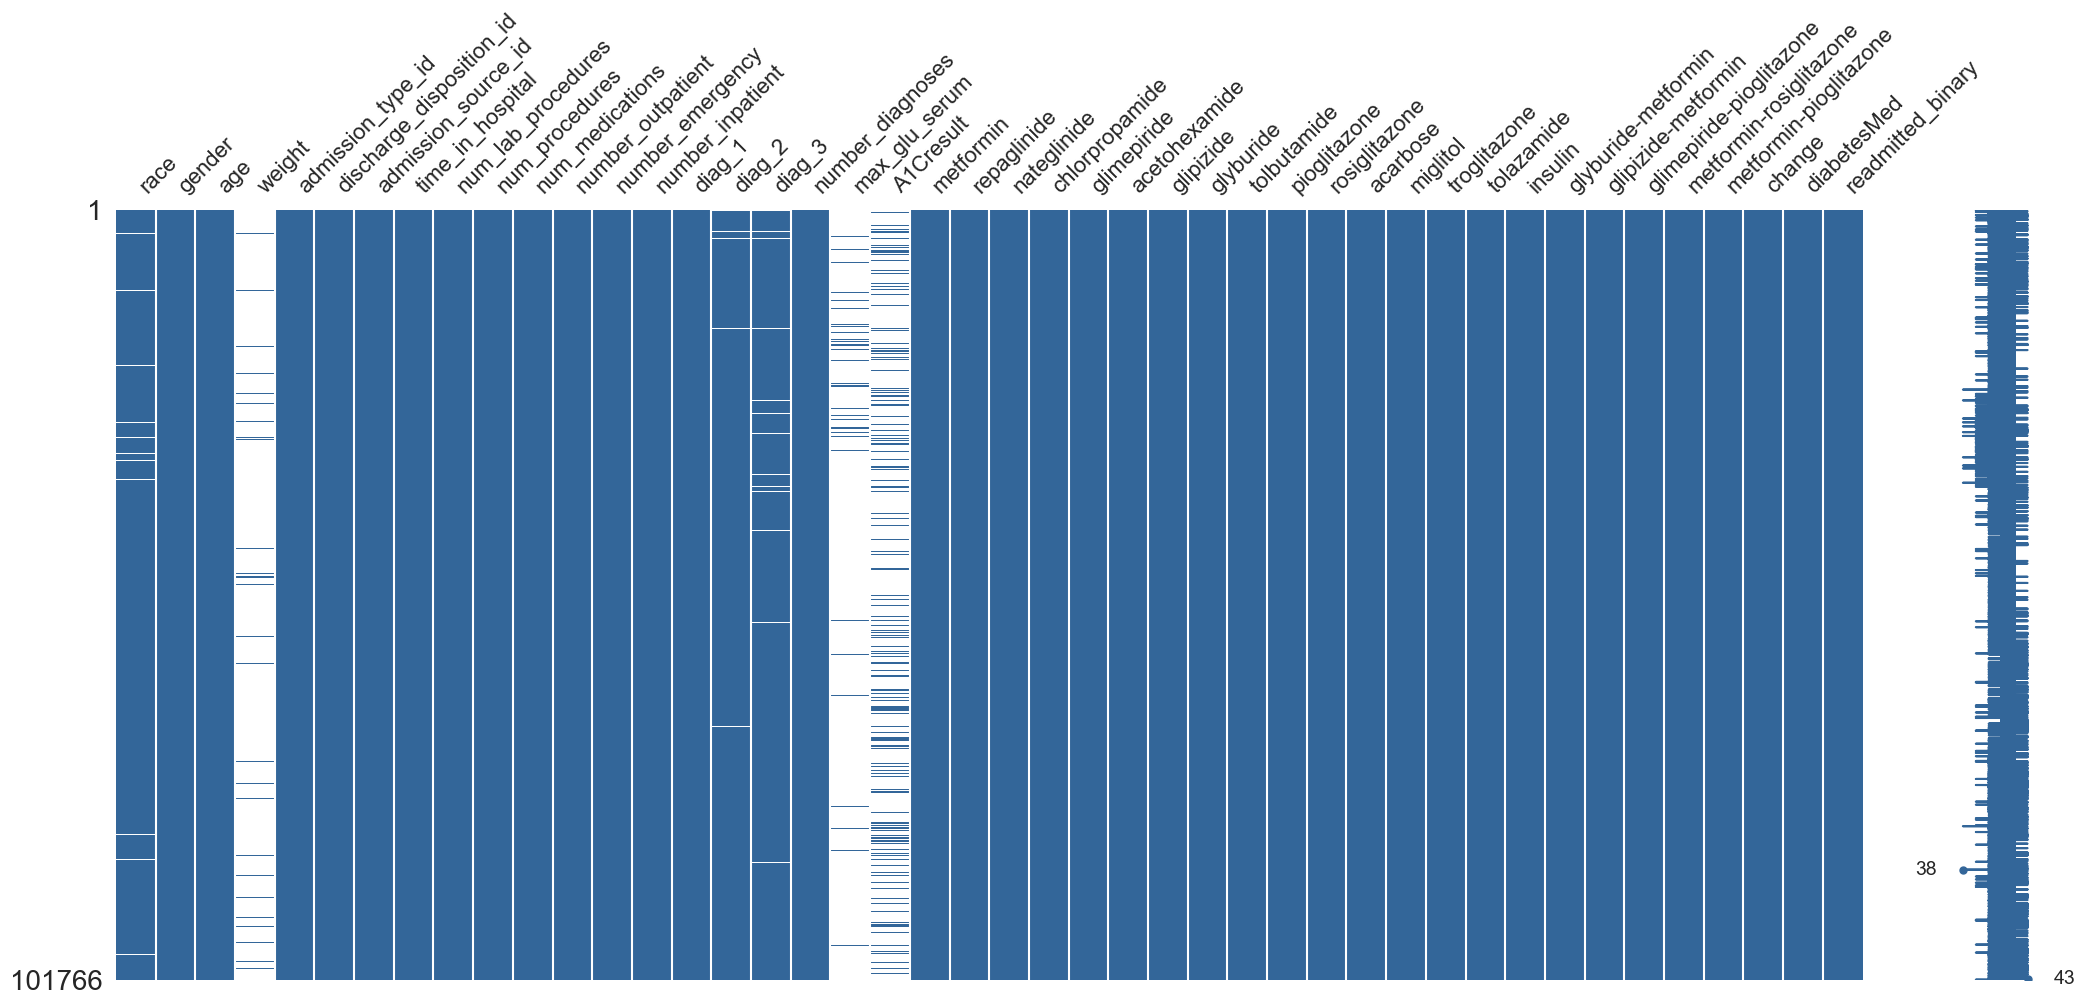

In [49]:
msno.matrix(df, color=(0.2, 0.4, 0.6))

In [50]:
df.drop(columns=["weight", "max_glu_serum", "A1Cresult"], inplace=True)

In [51]:
def map_icd9(code):
    if pd.isna(code):
        return "Unknown"

    try:
        code = float(code)
    except:
        return "Unknown"

    if 250 <= code < 251:
        return "Diabetes"
    elif 390 <= code < 460:
        return "Circulatory"
    elif 460 <= code < 520:
        return "Respiratory"
    elif 520 <= code < 580:
        return "Digestive"
    elif 580 <= code < 630:
        return "Genitourinary"
    elif 140 <= code < 240:
        return "Cancer"
    elif 710 <= code < 740:
        return "Musculoskeletal"
    elif 800 <= code < 1000:
        return "Injury"
    else:
        return "Other"


In [52]:
for col in ["diag_1", "diag_2", "diag_3"]:
    df[col + "_group"] = df[col].apply(map_icd9)


In [53]:
df.drop(columns=["diag_1", "diag_2", "diag_3"], inplace=True)

In [54]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

<Axes: >

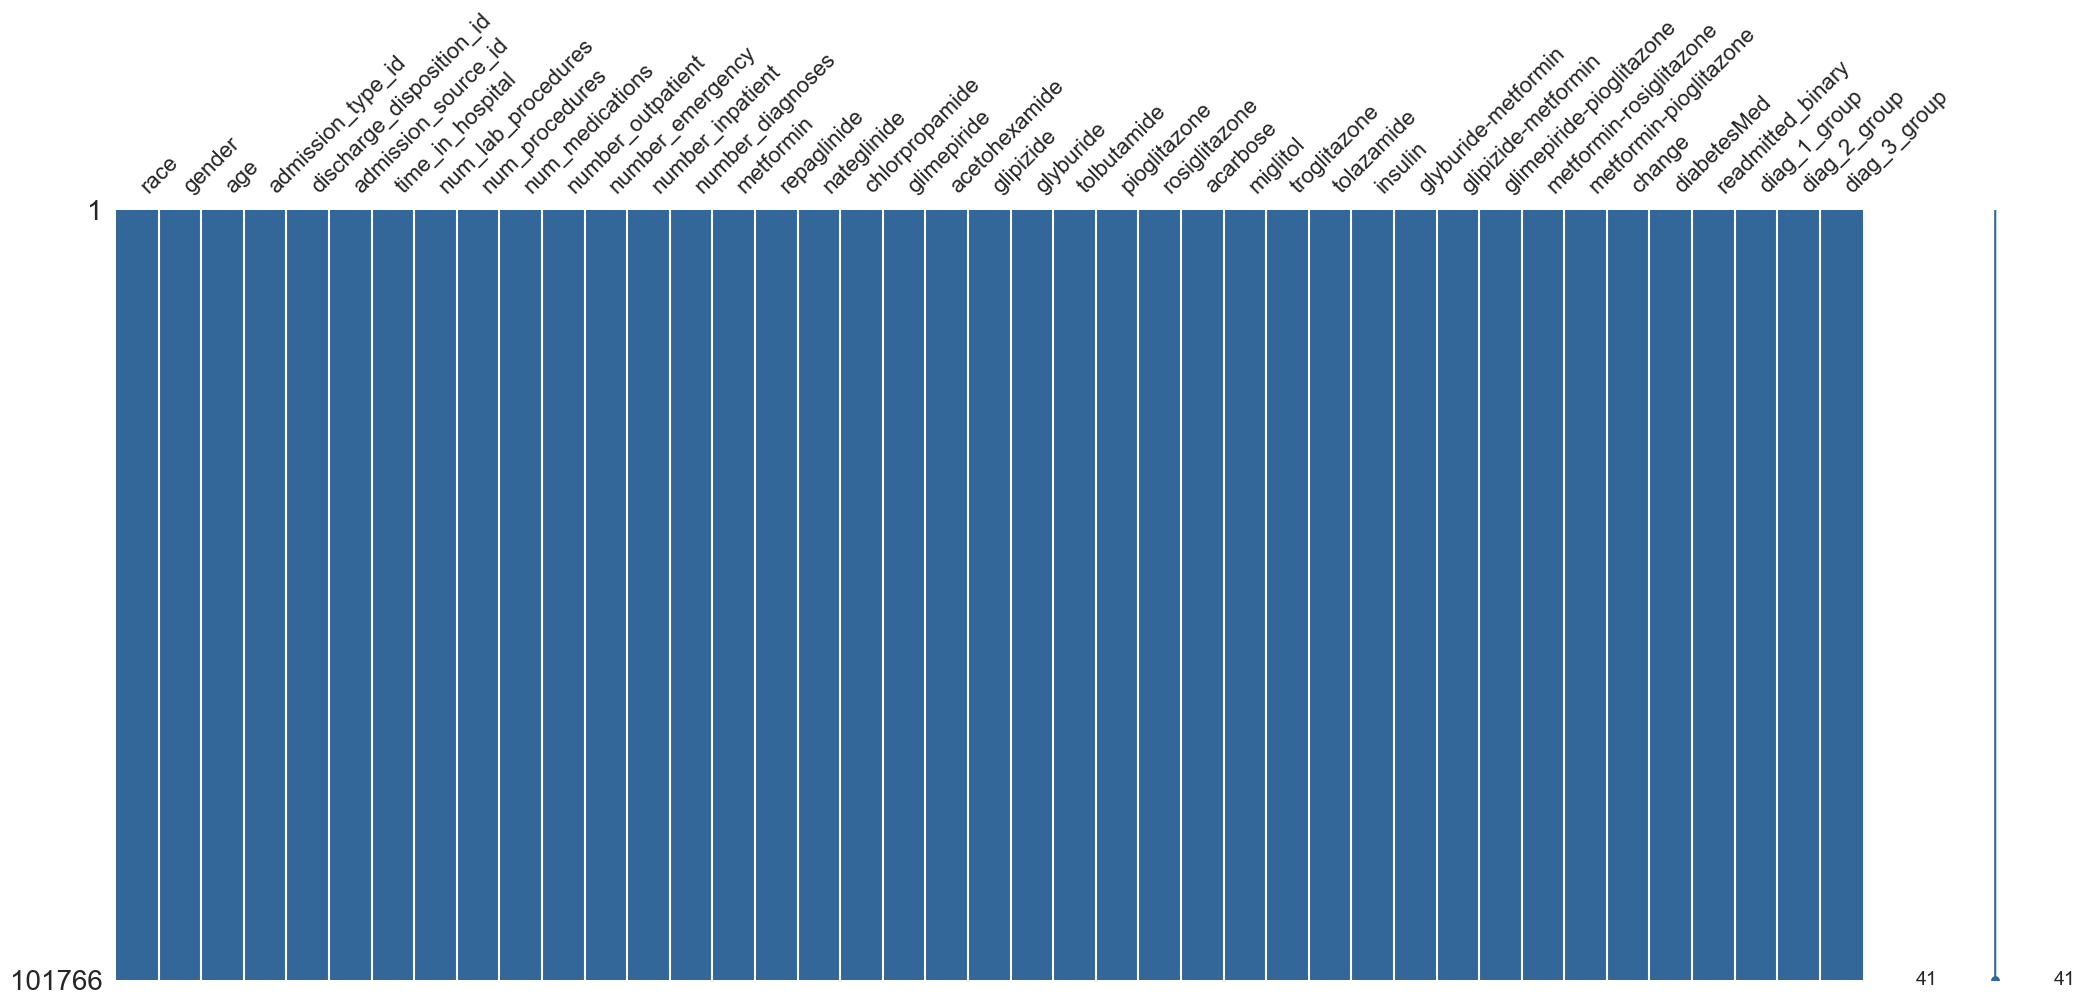

In [55]:
msno.matrix(df, color=(0.2, 0.4, 0.6))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  number_diagnoses          101766 non-null  int64 
 14  metf

In [57]:
label_col = 'readmitted_binary'

In [58]:
# Numerical Cols

num_cols = df.select_dtypes(include = ['float','int64']).columns.tolist()
num_cols = [col for col in num_cols if col != label_col]
display(len(num_cols))
display(num_cols)

11

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [59]:
# cat cols

cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
display(len(cat_cols))
display(cat_cols)

29

['race',
 'gender',
 'age',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'diag_1_group',
 'diag_2_group',
 'diag_3_group']

#### Analyzing Numerical Cols

In [60]:
display(df[num_cols].shape)
display(df[num_cols].columns)
df[num_cols].head()

(101766, 11)

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,6,25,1,1,41,0,1,0,0,0,1
1,1,1,7,3,59,0,18,0,0,0,9
2,1,1,7,2,11,5,13,2,0,1,6
3,1,1,7,2,44,1,16,0,0,0,7
4,1,1,7,1,51,0,8,0,0,0,5


In [61]:
df[num_cols].describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


<Figure size 1200x500 with 0 Axes>

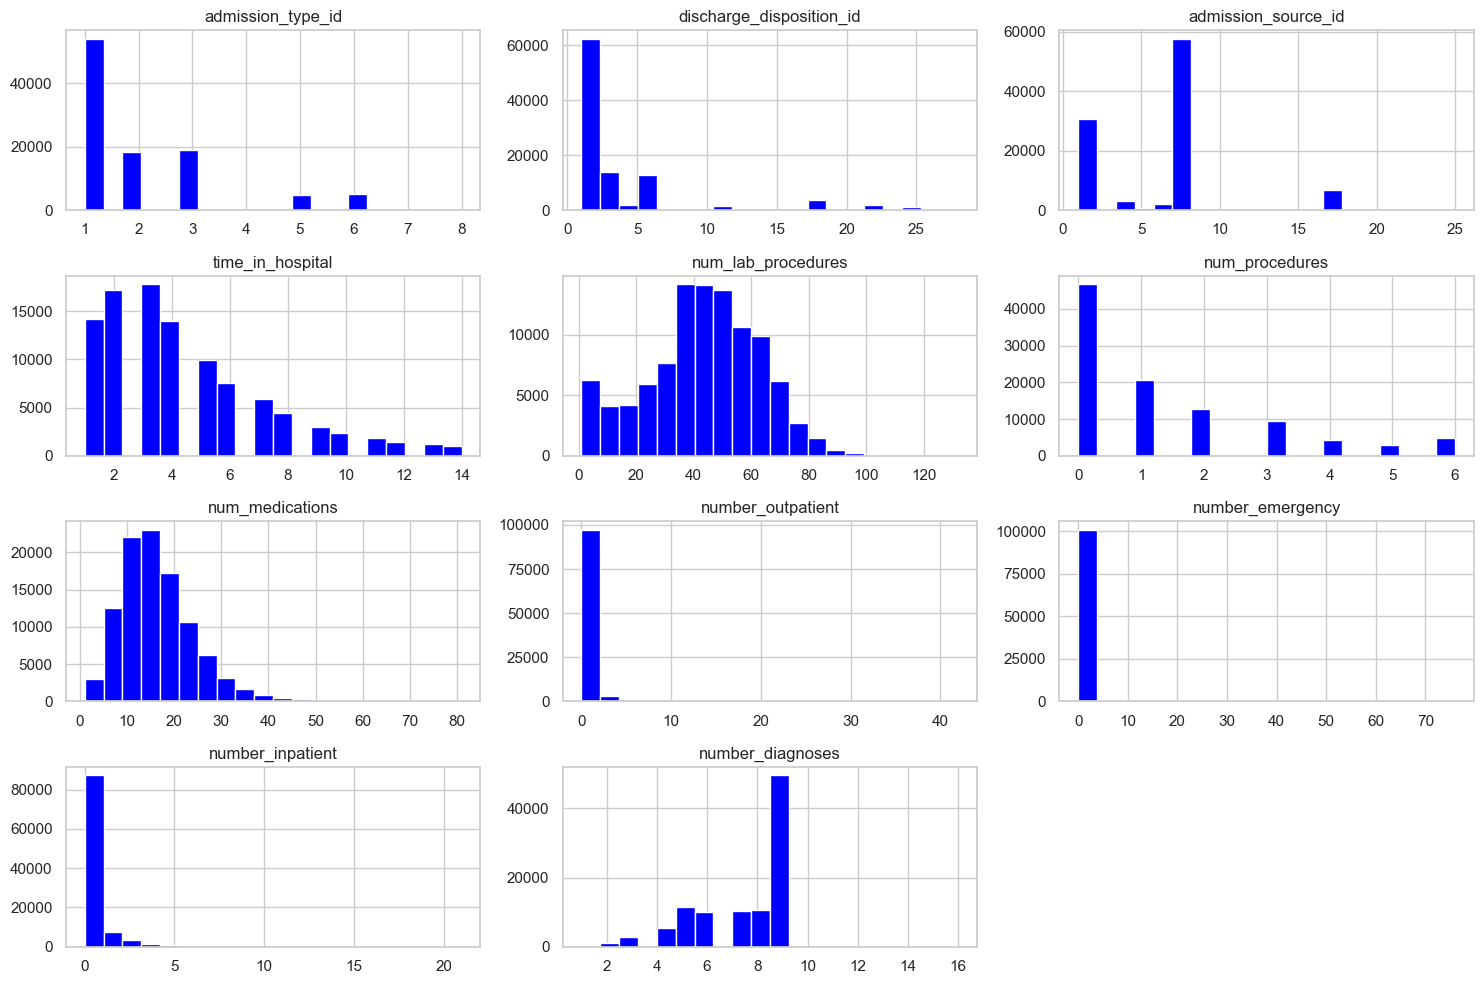

In [62]:
plt.figure(figsize=(12,5))
df[num_cols].hist(bins=20, figsize = (15,10), color='blue', edgecolor ='white')
plt.tight_layout()
plt.show()

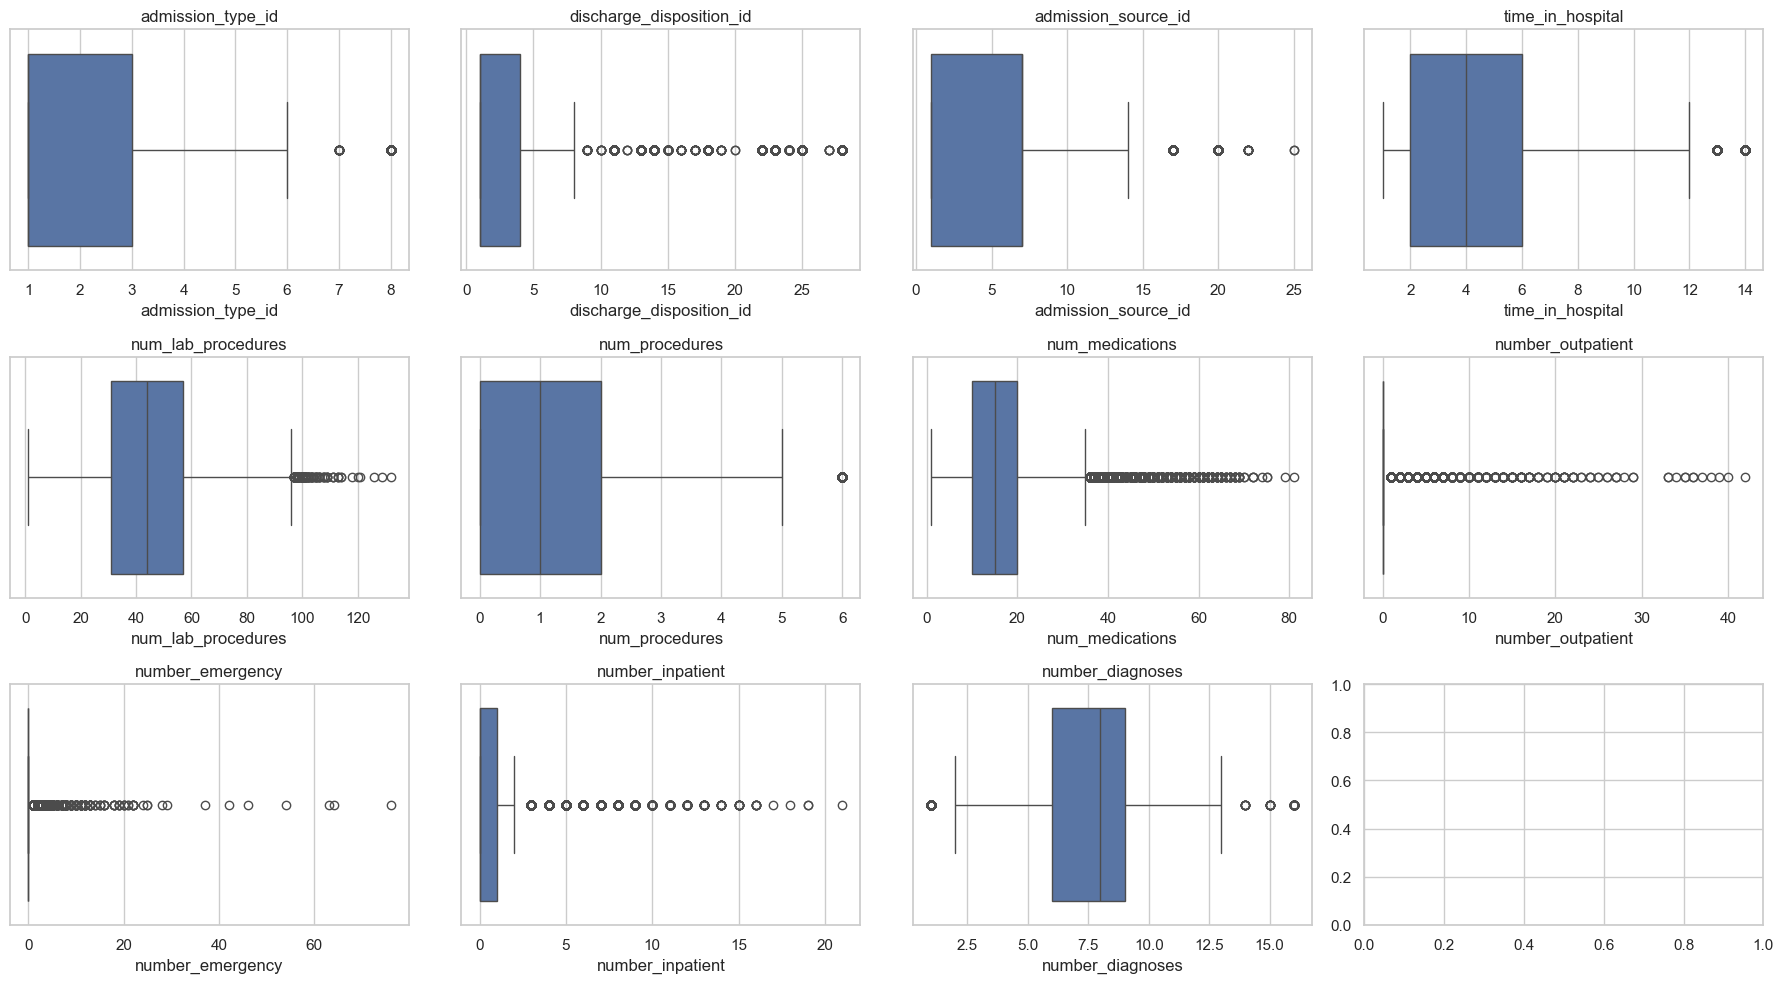

In [63]:
# check for oputliers

n_cols = 4 
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], showfliers=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

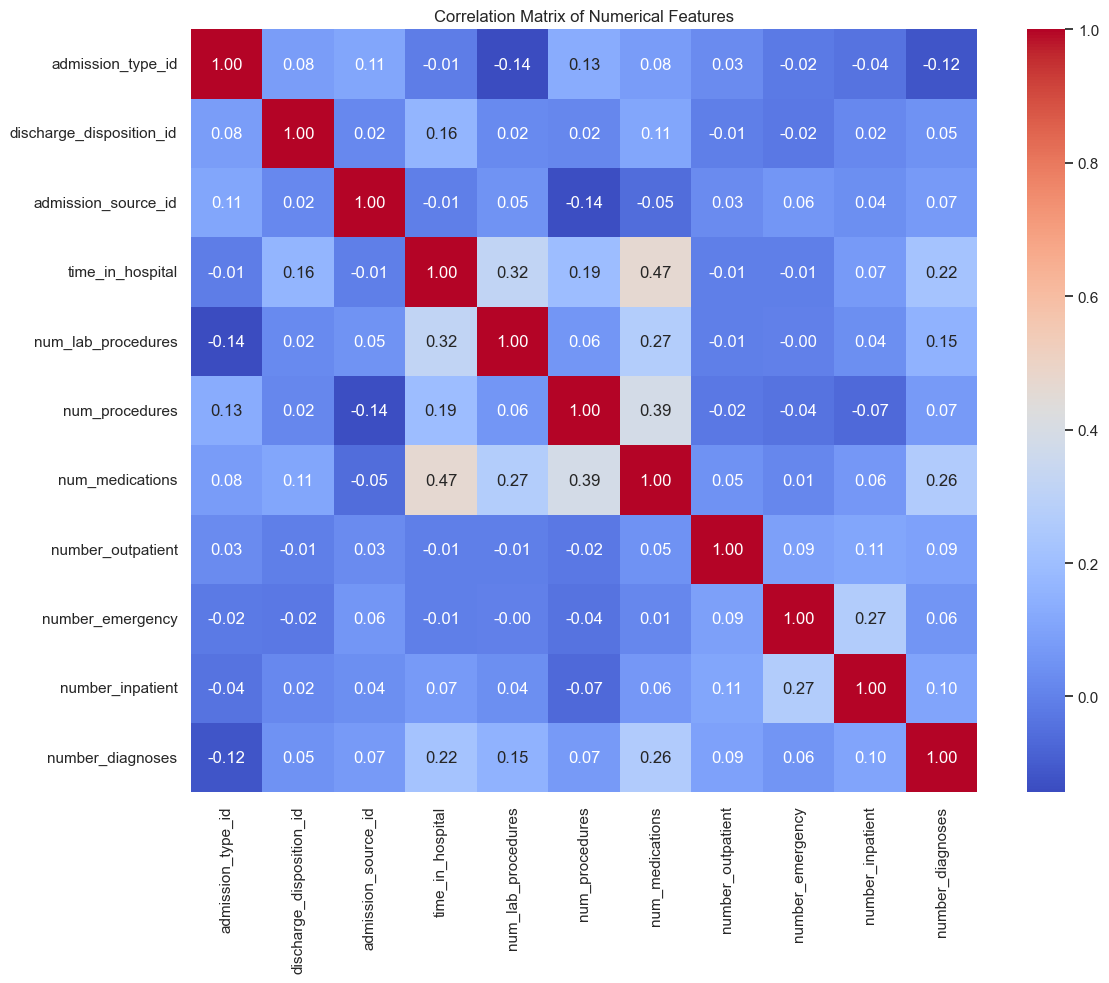

In [64]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()



In [65]:
display(len(cat_cols))
display(df[cat_cols].columns)

29

Index(['race', 'gender', 'age', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_1_group',
       'diag_2_group', 'diag_3_group'],
      dtype='object')

In [66]:
df[cat_cols].head()

,race,gender,age,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_group,diag_2_group,diag_3_group
0,Caucasian,Female,[0-10),No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Diabetes,Unknown,Unknown
1,Caucasian,Female,[10-20),No,No,No,No,No,No,No,...,No,No,No,No,No,Ch,Yes,Other,Diabetes,Other
2,AfricanAmerican,Female,[20-30),No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,Yes,Other,Diabetes,Unknown
3,Caucasian,Male,[30-40),No,No,No,No,No,No,No,...,No,No,No,No,No,Ch,Yes,Other,Diabetes,Circulatory
4,Caucasian,Male,[40-50),No,No,No,No,No,No,Steady,...,No,No,No,No,No,Ch,Yes,Cancer,Cancer,Diabetes


In [67]:
label_col

'readmitted_binary'

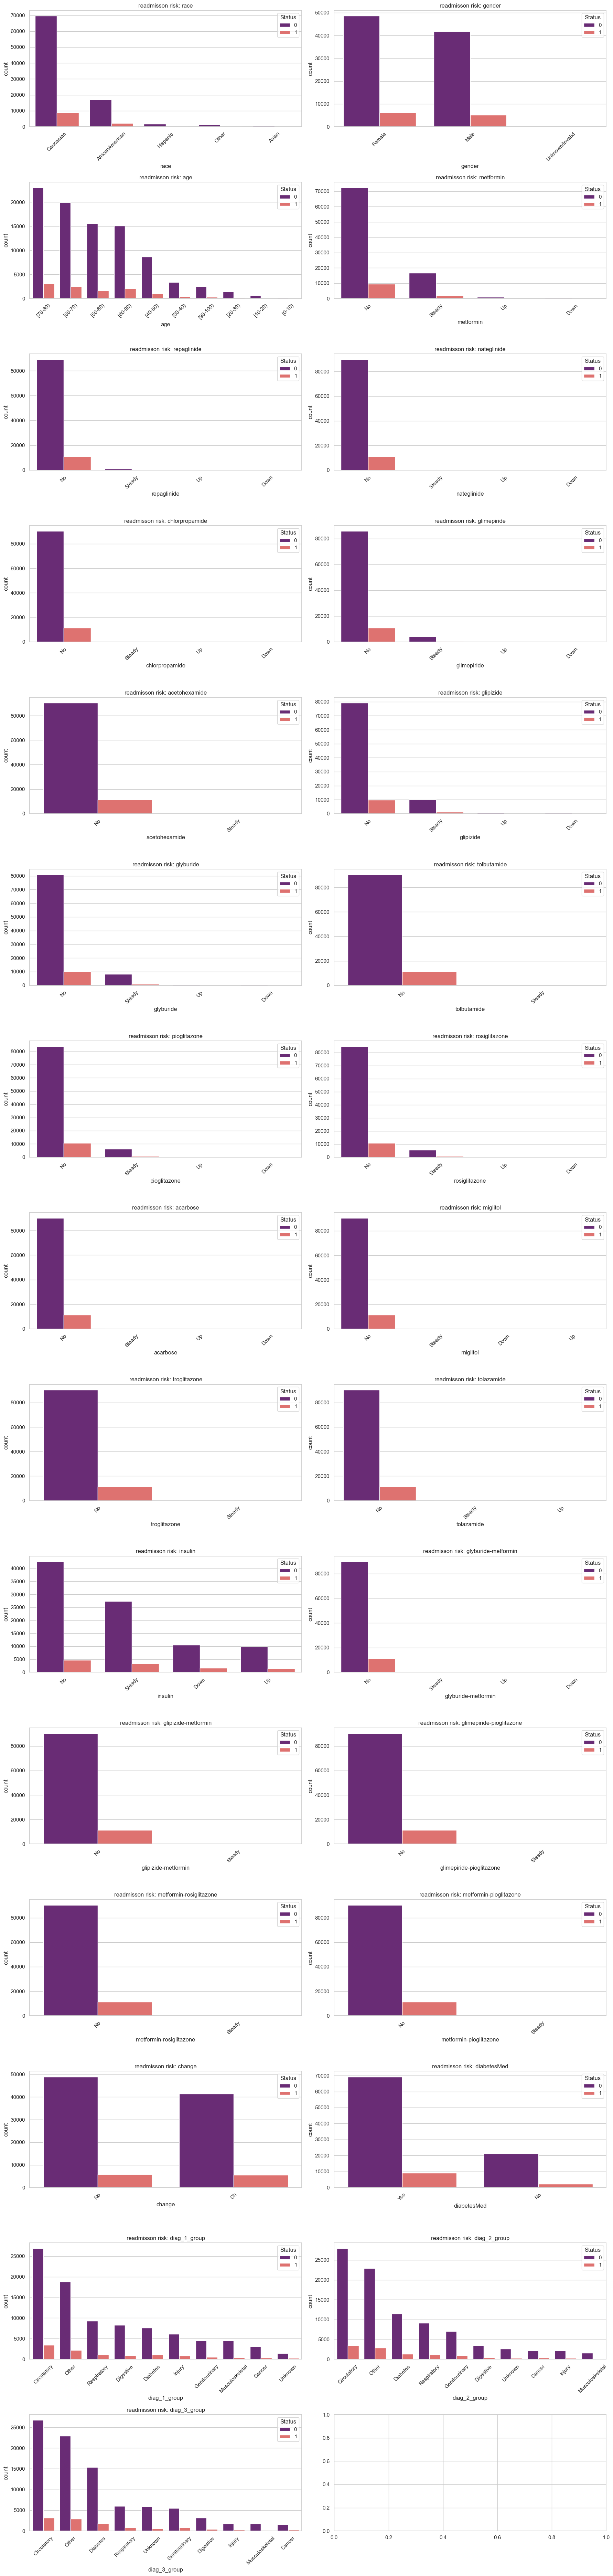

In [68]:
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):

    top10 = df[col].value_counts().nlargest(10).index
    data_to_plot = df[df[col].isin(top10)]
    
    sns.countplot(
        data=data_to_plot,
        x=col,
        hue=label_col,
        order=top10,
        palette='magma',
        ax=axes[i]
    )
    
    axes[i].set_title(f'readmisson risk: {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Status', loc='upper right')


plt.tight_layout()
plt.show()

In [69]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_binary,diag_1_group,diag_2_group,diag_3_group
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,0,Diabetes,Unknown,Unknown
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,Ch,Yes,0,Other,Diabetes,Other
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,Yes,0,Other,Diabetes,Unknown
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,Ch,Yes,0,Other,Diabetes,Circulatory
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,Ch,Yes,0,Cancer,Cancer,Diabetes


In [ ]:
 df.to_csv('F:/MyProjects/PraxisProjects/hospital-readmission-risk-prediction/notebooks/dataset/data_eda.csv',index=False)